### ML- CUSTOMER CHURN FOR A TELECOMMUNICATION COMPANY

##### Author  : Adeyemi Bolaji

### Dataset Description

Each row represents a customer, each column contains customer’s attributes described below;
* Gender - If the customer is a male or a female
* Senior Citizen - If the customer is a senior citizen or not (1, 0)
* Partner - If the customer has a partner or not (Yes, No)
* Dependents - If the customer has dependents or not (Yes, No)
* Tenure - Number of months the customer has stayed with the company
* PhoneService - If the customer has a phone service or not (Yes, No)
* MultipleLines - If the customer has multiple lines or not (Yes, No, No phone service)
* InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
* Contract - Types contract the customer uses (Month-to-month, One year, Two year)
etc.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

#### Data Source - Kaggle

### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

import random
random.seed(42)


In [2]:
cc = pd.read_csv('C:\\Users\\bolaj\\Desktop\\Desk\\Data\\Telco-Customer-Churn.csv')

### Data Inspection

In [3]:
cc.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
cc.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
cc.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
cc.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6526,3190-XFANI,Male,0,No,Yes,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),100.6,5069.65,Yes
962,9489-UTFKA,Male,1,Yes,No,8,Yes,No,DSL,Yes,...,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),60.9,551.95,No
4116,2466-FCCPT,Female,0,Yes,Yes,20,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.7,395.6,No


In [8]:
cc.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
cc.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [10]:
cc.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [11]:
cc.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [12]:
cc.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [13]:
#Changing Total charges from object to numbers
cc.TotalCharges = pd.to_numeric(cc.TotalCharges, errors='coerce')
cc.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
cc.customerID.nunique()

7043

In [15]:
cc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
cc['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [17]:
cc[cc['tenure']==72]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
28,5248-YGIJN,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No
35,6234-RAAPL,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),99.90,7251.70,No
59,5954-BDFSG,Female,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),107.50,7853.70,No
62,0526-SXDJP,Male,0,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,No,Bank transfer (automatic),42.10,2962.00,No
94,9848-JQJTX,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),100.90,7459.05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6982,8468-FZTOE,Female,0,Yes,Yes,72,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Electronic check,74.35,5237.40,No
7007,2274-XUATA,Male,1,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No
7022,7203-OYKCT,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.30,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No


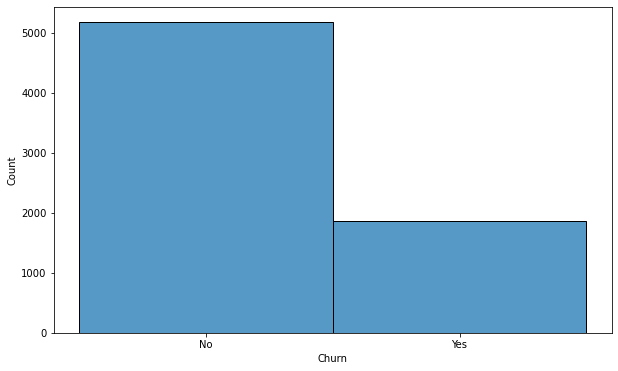

In [18]:
plt.figure(figsize=(10, 6))

sns.histplot(cc , x='Churn',bins=70);

The target is not normally distributed 

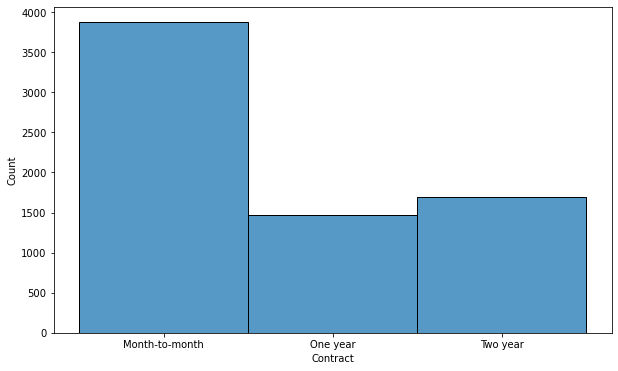

In [19]:
plt.figure(figsize=(10, 6))

sns.histplot(cc , x='Contract',bins=70);

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

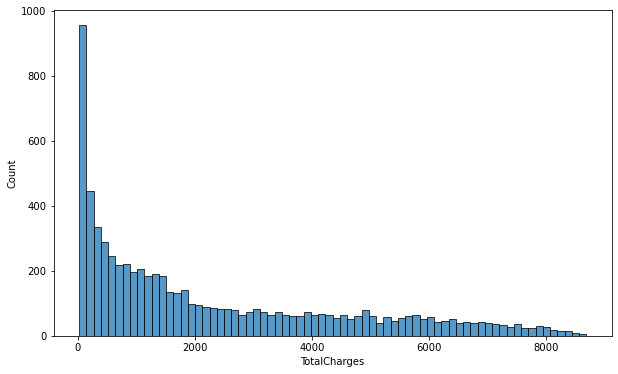

In [20]:
plt.figure(figsize=(10, 6))

sns.histplot(cc , x='TotalCharges',bins=70)

### Dealing with the null Value

* Contract have a realtionship with the total charges. Which is a perfect feature to determine the Total charges.

In [21]:
cc.loc[cc['TotalCharges'].isnull()].sample(frac=0.25)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [22]:
#Contract type is a major factor that determines each customers Total Charge
cc['TotalCharges'] =(cc
                .groupby(['Contract','gender'],sort=False)['TotalCharges']
                .apply(lambda x : x.fillna(round(x.mean(),1)))
                         )

In [23]:
cc[cc['TotalCharges'].isnull()].sample(frac=0.25)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Data Visualisation

* Checking the relationship between the Contract Types and Churn using count plot
* Checking the Monthly charges relationship with Churn using Boxplot and Violin plot

### Discoveries
##### Comparing Monthly contract to Others (Yearly and Bi-yearly)
* Month to Month Groups had higher rate of churn ,because customers committment or rentention is not guaranteed compare to Yearly contract. 


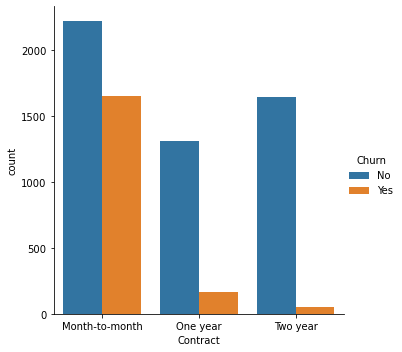

In [24]:
sns.catplot(data=cc, x="Contract", hue="Churn" , kind='count')

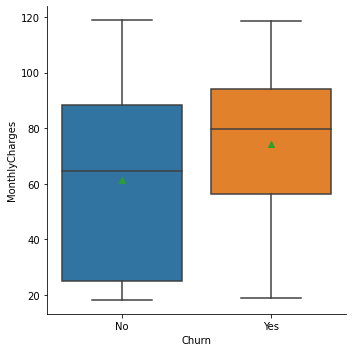

In [25]:
sns.catplot(data=cc,x= 'Churn' , y="MonthlyCharges" , kind='box', showmeans= True)

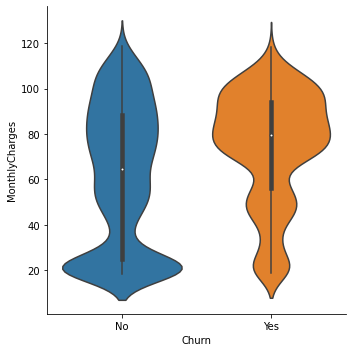

In [26]:
sns.catplot(data=cc,x= 'Churn' , y="MonthlyCharges" , kind='violin', showmeans= True)

Stacked barchart code gotten from kaggle search , but modified into a function

In [27]:
def stack_plot(cc,id_vars,value_vars,x,y,z,a,b):
    cc = pd.melt(cc, id_vars, value_vars)
    df3 = cc.groupby([x,y]).count().unstack()
    df3 = df3*100/len(cc)
    colors = ['#4D3425','#E4512B']
    ax = df3.loc[:,z].plot.bar(stacked=True, color=colors,
                                          figsize=(8,6),rot = 0,
                                         width = 0.2)

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel(a,size = 14)
    ax.set_xlabel('')
    ax.set_title(b,size = 14)
    ax.legend(loc = 'center',prop={'size':14})

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                    color = 'white',
                   weight = 'bold',
                   size = 14)


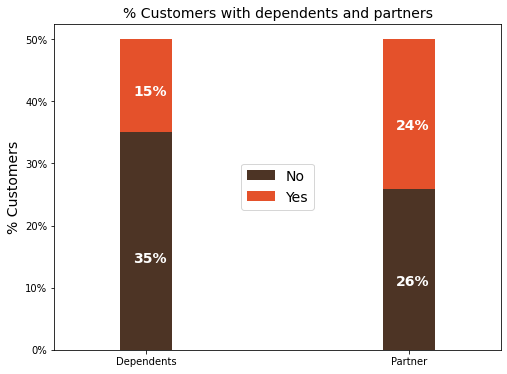

In [28]:
stack_plot(cc,'customerID',['Dependents','Partner'],'variable','value','customerID','% Customers','% Customers with dependents and partners')

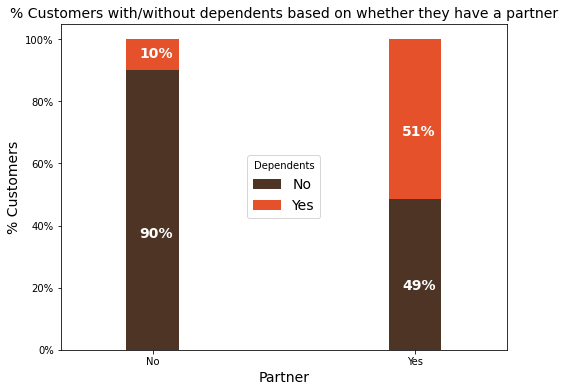

In [29]:
colors = ['#4D3425','#E4512B']
partner_dependents = cc.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

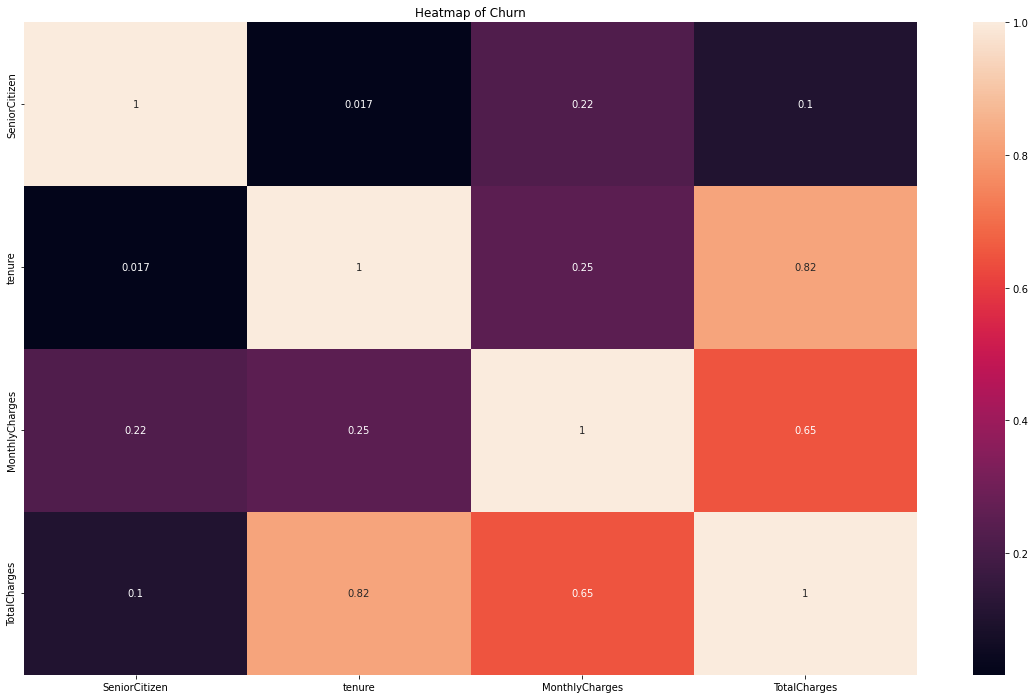

In [30]:
plt.figure(figsize=(20, 12))

sns.heatmap(cc.corr(), annot=True)

plt.title('Heatmap of Churn')
plt.show();

### Machine Learning 

#### Model Building 

In [31]:
#astype can also be used to convert it from catergories 
cc['Churn'] = cc['Churn'].astype('category').cat.codes

In [32]:
cc[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']] = cc[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']].astype('object')


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
cc.set_index('customerID',inplace=True)

In [35]:
X = cc.drop(['Churn'],axis=1)

y = cc['Churn']
X.shape, y.shape

((7043, 19), (7043,))

In [36]:
 X_train, X_test, y_train, y_test = train_test_split(
    cc.drop(['Churn'],axis=1), cc['Churn'],
     test_size=0.25, random_state=20,
)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5282, 19), (5282,), (1761, 19), (1761,))

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,precision_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder

#import pipeline and transformers
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer


import time

In [38]:
Target_encoding = make_pipeline(
  TargetEncoder(
        handle_unknown='value'
    ),
)
Target_encoding

Pipeline(steps=[('targetencoder', TargetEncoder())])

In [39]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
3428-MMGUB,Male,0,No,No,60,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Two year,Yes,Electronic check,89.55,5231.20
0572-ZJKLT,Female,0,Yes,Yes,46,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,99.65,4630.20
8634-CILSZ,Male,0,No,No,69,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),104.70,7220.35
3280-MRDOF,Male,1,No,No,30,Yes,Yes,DSL,No,No,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),69.10,2093.90
5986-WWXDV,Male,0,No,Yes,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.35,779.20


In [40]:
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [41]:
#Configure Time
start_time=time.time()

In [42]:
category_column =['gender','Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                  'StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
preprocessor = ColumnTransformer(
    transformers=[
        ('TargetEncoder',Target_encoding,category_column)
    ],
    remainder='passthrough',
    verbose=0
)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('TargetEncoder',
                                 Pipeline(steps=[('targetencoder',
                                                  TargetEncoder())]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])],
                  verbose=0)

In [43]:
X_train.shape

(5282, 19)

In [44]:
DecisionTreepipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("DecisionTreeClassifier", DecisionTreeClassifier(
        ))
    ]
)
DecisionTreepipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('TargetEncoder',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])],
                                   verbose=0)),
                ('DecisionTreeClassifier', DecisionTreeClassifier())])

In [45]:
RandomForestpipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("RandomForestClassifier", RandomForestClassifier(
        ))
    ]
)
RandomForestpipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('TargetEncoder',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])],
                                   verbose=0)),
                ('RandomForestClassifier', RandomForestClassifier())])

In [46]:
X_train.shape

(5282, 19)

In [47]:
preprocessor.fit_transform(X_train,y_train)

array([[0.26445032111824707, 0.3313782991202346, 0.3166441136671177, ...,
        60, 89.55, 5231.2],
       [0.27362428842504743, 0.2024275646045419, 0.1581600504095778, ...,
        46, 99.65, 4630.2],
       [0.26445032111824707, 0.3313782991202346, 0.3166441136671177, ...,
        69, 104.7, 7220.35],
       ...,
       [0.26445032111824707, 0.2024275646045419, 0.3166441136671177, ...,
        70, 115.65, 7968.85],
       [0.26445032111824707, 0.2024275646045419, 0.3166441136671177, ...,
        36, 54.1, 1992.85],
       [0.26445032111824707, 0.2024275646045419, 0.1581600504095778, ...,
        53, 78.75, 3942.45]], dtype=object)

In [48]:
DecisionTreepipeline.fit(X_train,y_train)
DecisionTreepipeline.score(X_train, y_train), DecisionTreepipeline.score(X_test, y_test)
DT_elapsed_time= time.time()-start_time

In [49]:
y_pred_Dt = DecisionTreepipeline.predict(X_test)
y_pred_Dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [50]:
Dt_acc = accuracy_score(y_test, y_pred_Dt)
Dt_prec = precision_score(y_test, y_pred_Dt)
Dt_rec = recall_score(y_test, y_pred_Dt)
Dt_f1 = f1_score(y_test, y_pred_Dt)
Dt_roc = roc_auc_score(y_test, y_pred_Dt)
Dt_class_report = classification_report(y_test, y_pred_Dt)


In [51]:
print("Elapsed Time : %5f seconds"%DT_elapsed_time)
print("Accuracy: ", Dt_acc)
print("Precision: ", Dt_prec)
print("Recall: ", Dt_rec)
print("F1 Score: ", Dt_f1)
print("AUC-ROC: ", Dt_roc)
print("Classification Report:\n", Dt_class_report)

Elapsed Time : 1.764198 seconds
Accuracy:  0.7348097671777399
Precision:  0.48140900195694714
Recall:  0.5491071428571429
F1 Score:  0.5130344108446298
AUC-ROC:  0.6736396338809705
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      1313
           1       0.48      0.55      0.51       448

    accuracy                           0.73      1761
   macro avg       0.66      0.67      0.67      1761
weighted avg       0.75      0.73      0.74      1761



In [52]:
RandomForestpipeline.fit(X_train,y_train)
RandomForestpipeline.score(X_train, y_train), RandomForestpipeline.score(X_test, y_test)
Rf_elapsed_time= time.time()-start_time

In [53]:
y_pred_Rf = RandomForestpipeline.predict(X_test)
y_pred_Rf

array([0, 0, 0, ..., 0, 1, 0], dtype=int8)

In [54]:
Rf_acc = accuracy_score(y_test, y_pred_Rf)
Rf_prec = precision_score(y_test, y_pred_Rf)
Rf_rec = recall_score(y_test, y_pred_Rf)
Rf_f1 = f1_score(y_test, y_pred_Rf)
Rf_roc = roc_auc_score(y_test, y_pred_Rf)
Rf_class_report = classification_report(y_test, y_pred_Rf)

In [55]:
print("Elapsed Time : %5f seconds"%Rf_elapsed_time)
print("Accuracy: ", Rf_acc)
print("Precision: ", Rf_prec)
print("Recall: ", Rf_rec)
print("F1 Score: ", Rf_f1)
print("AUC-ROC: ", Rf_roc)
print("Classification Report:\n", Rf_class_report)

Elapsed Time : 5.347456 seconds
Accuracy:  0.8001135718341851
Precision:  0.6224489795918368
Recall:  0.5446428571428571
F1 Score:  0.580952380952381
AUC-ROC:  0.7159619464693723
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1313
           1       0.62      0.54      0.58       448

    accuracy                           0.80      1761
   macro avg       0.74      0.72      0.72      1761
weighted avg       0.79      0.80      0.80      1761



In [56]:
model_scores =[]

In [57]:
column_name= ['model','Precision','Accuracy','ELAPSED_TIME (seconds)']
scores = [('RandomForest Classifier', Rf_prec,Rf_acc ,Rf_elapsed_time),
        ('DecisionTree Classifier', Rf_prec,Dt_acc,DT_elapsed_time )]


model_scores = pd.DataFrame(scores,
                            columns=column_name).sort_values(by=['Accuracy','ELAPSED_TIME (seconds)'], ascending=[False,True]).set_index('model')

In [58]:
model_scores

,Precision,Accuracy,ELAPSED_TIME (seconds)
model,,,
RandomForest Classifier,0.622449,0.800114,5.347456
DecisionTree Classifier,0.622449,0.734810,1.764198


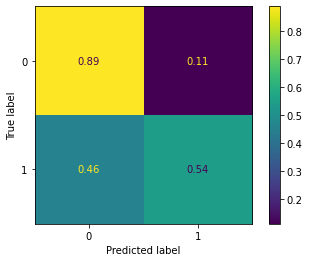

In [59]:
cm = confusion_matrix(
    y_test, y_pred_Rf,normalize='true'
)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [60]:
param_grid = {
    'max_depth': [ 2, 5, 8, 11, 13 ],
    'min_samples_split': [ 10, 12, 3 ],
    'min_samples_leaf': [ 4, 8, 12]
}

In [61]:
grid = GridSearchCV(
    RandomForestClassifier(), param_grid, scoring='balanced_accuracy', return_train_score=True,cv=5
)

In [62]:
grid_X_train = preprocessor.fit_transform(X_train,y_train)

In [63]:
grid.fit(grid_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 8, 11, 13],
                         'min_samples_leaf': [4, 8, 12],
                         'min_samples_split': [10, 12, 3]},
             return_train_score=True, scoring='balanced_accuracy')

In [64]:
gs_results = pd.DataFrame(grid.cv_results_)

In [65]:
gs_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [66]:
gs_results[
    ['param_max_depth', 'param_min_samples_split', 'mean_train_score', 
     'mean_test_score', 'rank_test_score'  ] 
].sort_values('mean_test_score', ascending=False)

,param_max_depth,param_min_samples_split,mean_train_score,mean_test_score,rank_test_score
18,8,10,0.757263,0.707539,1
22,8,12,0.747842,0.707422,2
20,8,3,0.758152,0.706907,3
29,11,3,0.804421,0.706604,4
32,11,3,0.764042,0.706392,5
31,11,12,0.762704,0.705911,6
30,11,10,0.763222,0.704817,7
23,8,3,0.746301,0.704685,8
24,8,10,0.740158,0.704667,9
38,13,3,0.816427,0.704634,10


In [67]:
best_dt = grid.best_estimator_
best_dt

RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=10)

In [68]:
RandomForestpipeline2 = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("RandomForestClassifier", RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=12
        ))
    ]
)
RandomForestpipeline2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('TargetEncoder',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])],
                                   verbose=0)),
                ('RandomForestClassifier',
                 RandomForestClassifier(max_depth=8, min_samples_leaf=4,
                                        min_samples_split=12))])

In [69]:
RandomForestpipeline2.fit(X_train,y_train)
RandomForestpipeline2.score(X_train, y_train), RandomForestpipeline2.score(X_test, y_test)
Rf2_elapsed_time= time.time()-start_time

In [70]:
y_pred_Rf2 = RandomForestpipeline.predict(X_test)
y_pred_Rf2

array([0, 0, 0, ..., 0, 1, 0], dtype=int8)

In [71]:
Rf2_acc = accuracy_score(y_test, y_pred_Rf)
Rf2_prec = precision_score(y_test, y_pred_Rf)
Rf2_rec = recall_score(y_test, y_pred_Rf)
Rf2_f1 = f1_score(y_test, y_pred_Rf)
Rf2_roc = roc_auc_score(y_test, y_pred_Rf)
Rf2_class_report = classification_report(y_test, y_pred_Rf)

In [72]:
print("Elapsed Time : %5f seconds"%Rf2_elapsed_time)
print("Accuracy: ", Rf2_acc)
print("Precision: ", Rf2_prec)
print("Recall: ", Rf2_rec)
print("F1 Score: ", Rf2_f1)
print("AUC-ROC: ", Rf2_roc)
print("Classification Report:\n", Rf2_class_report)

Elapsed Time : 313.668874 seconds
Accuracy:  0.8001135718341851
Precision:  0.6224489795918368
Recall:  0.5446428571428571
F1 Score:  0.580952380952381
AUC-ROC:  0.7159619464693723
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1313
           1       0.62      0.54      0.58       448

    accuracy                           0.80      1761
   macro avg       0.74      0.72      0.72      1761
weighted avg       0.79      0.80      0.80      1761



#### CHECKING FEATURE IMPORTANCE

In [73]:
from eli5.sklearn import PermutationImportance
import eli5

In [74]:
RandomForestpipeline2.named_steps['RandomForestClassifier'].feature_importances_

array([0.00952309, 0.00888345, 0.00900353, 0.00454327, 0.01430578,
       0.0872093 , 0.07610684, 0.0266777 , 0.02006462, 0.07487348,
       0.01487226, 0.01826768, 0.17135169, 0.01735957, 0.04551831,
       0.0108783 , 0.17117398, 0.09574679, 0.12364038])

In [75]:
RandomForestpipeline2.feature_names_in_

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'], dtype=object)

In [76]:
feat_imp = pd.DataFrame(
     RandomForestpipeline2.named_steps['RandomForestClassifier'].feature_importances_,
     index=RandomForestpipeline2.feature_names_in_,
     columns=['feat_imp']
)
feat_imp.sort_values('feat_imp',ascending=False).head(10)

,feat_imp
StreamingTV,0.171352
PaymentMethod,0.171174
TotalCharges,0.123640
MonthlyCharges,0.095747
PhoneService,0.087209
MultipleLines,0.076107
OnlineBackup,0.074873
Contract,0.045518
InternetService,0.026678
OnlineSecurity,0.020065


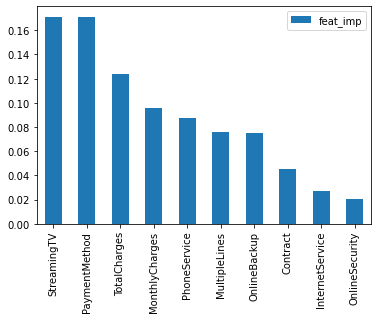

In [77]:
feat_imp.sort_values('feat_imp',ascending=False).head(10).plot.bar();

### Analysis of features 
Based on the feature importance values provided, the top 3 factors that contribute to customer churn in the telecommunications industry are:

* StreamingTV: This feature has the highest importance, with a value of 0.171352, indicating that customers who use streaming TV services are more likely to churn.

* PaymentMethod: This feature has the second highest importance, with a value of 0.171174, indicating that customers who use certain payment methods are more likely to churn.


* TotalCharges: This feature has the third highest importance, with a value of 0.123640, indicating that customers who have higher total charges are more likely to churn.But seeing that Total charges is strongly correlated to StreamingTV and Monthly charges ,it can be deduced that StreamingTV and high monthly charges are likely to churn.

However , this info can be useful for further evaluation as to why customer streamingTv churn, though its obvious that they spend more streamingTV and thats why their monthly charges are high




In [78]:
cc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


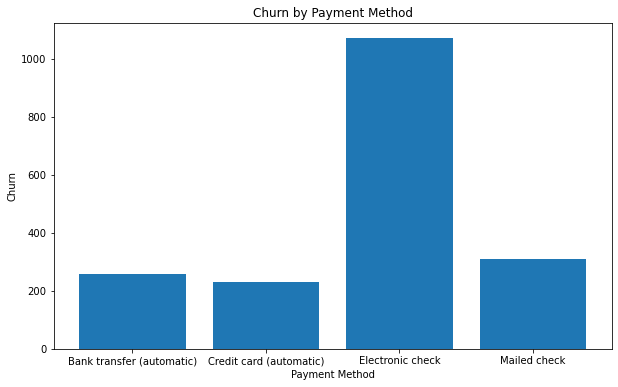

In [79]:
plt.figure(figsize=(10, 6))

# Count the number of customers with each payment method
payment_method_counts = cc.groupby('PaymentMethod').Churn.sum()

# Create a bar chart
plt.bar(payment_method_counts.index, payment_method_counts.values)
plt.xlabel('Payment Method')
plt.ylabel('Churn')
plt.title('Churn by Payment Method')
plt.show()

### Inference

Can be assumed that customers with the Electronic check payment method are likely to churn 

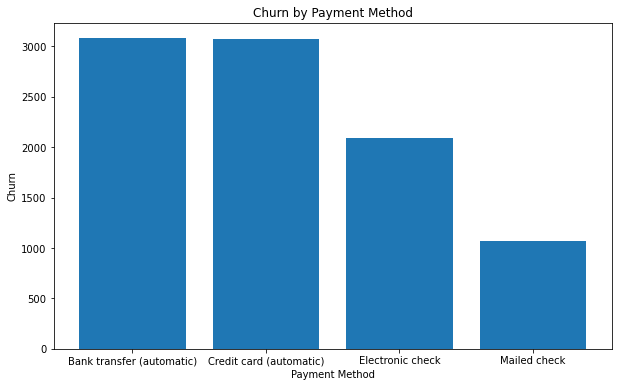

In [80]:
plt.figure(figsize=(10, 6))

payment_method_total = cc.groupby('PaymentMethod').TotalCharges.mean()

# Create a bar chart
plt.bar(payment_method_total.index, payment_method_total.values)
plt.xlabel('Payment Method')
plt.ylabel('Churn')
plt.title('Churn by Payment Method')
plt.show()

In [81]:
cc.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

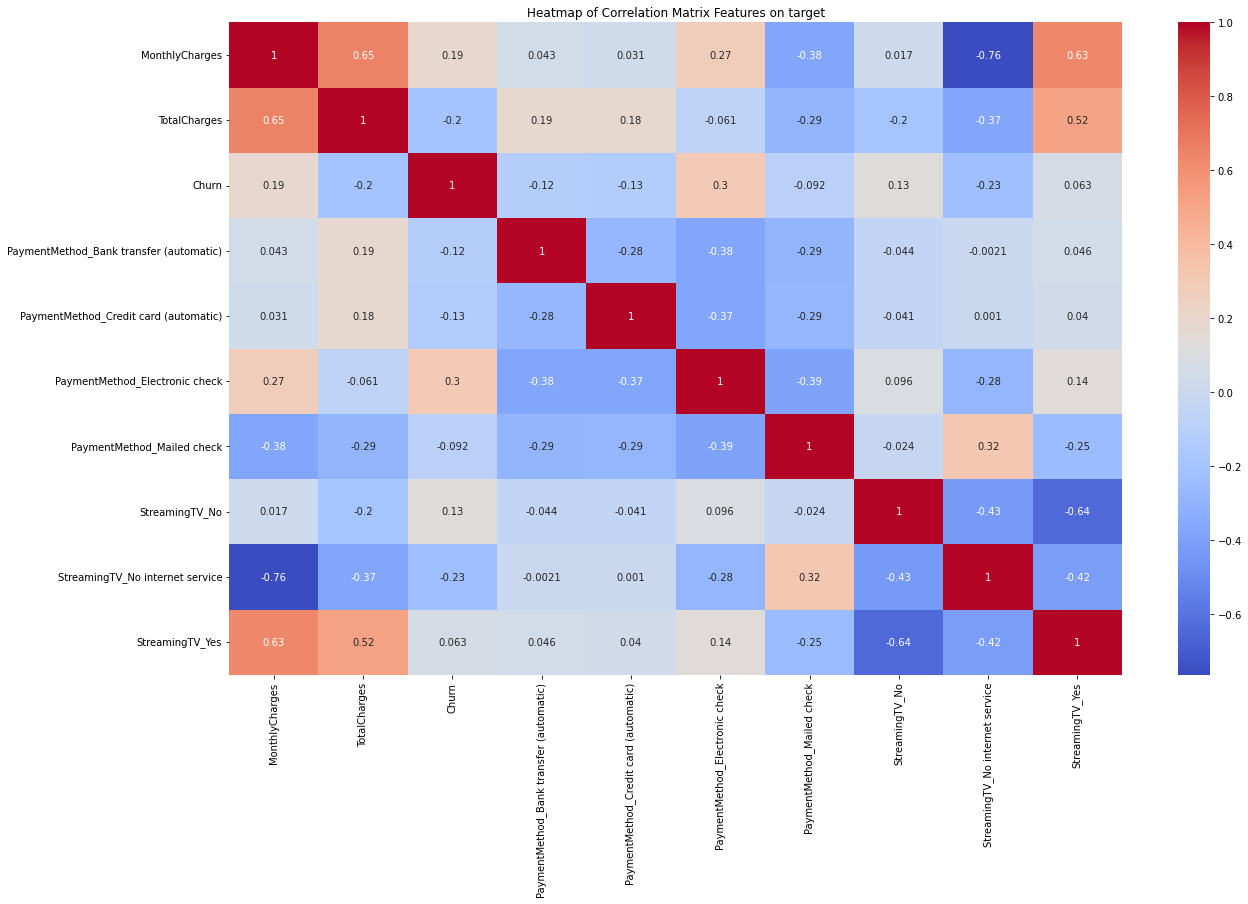

In [82]:
# Convert categorical features into dummy variables
data_dummies = pd.get_dummies(cc, columns=['PaymentMethod', 'StreamingTV'])

plt.figure(figsize=(20, 12))

# Create a heatmap of the correlation matrix
sns.heatmap(data_dummies.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix Features on target')
plt.show()